In [3]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
president_polls = pd.read_csv("/Users/csuftitan/Documents/Election2024-main/archive-2/polls/president_polls.csv")
president_polls

,poll_id,pollster_id,pollster,sponsor_ids,sponsors,display_name,pollster_rating_id,pollster_rating_name,fte_grade,methodology,...,election_date,stage,nationwide_batch,ranked_choice_reallocated,ranked_choice_round,party,answer,candidate_id,candidate_name,pct
0,84599,1189,Morning Consult,NaN,NaN,Morning Consult,218,Morning Consult,B-,Online Panel,...,11/5/24,general,False,False,NaN,DEM,Biden,19368,Joe Biden,42.0
1,84599,1189,Morning Consult,NaN,NaN,Morning Consult,218,Morning Consult,B-,Online Panel,...,11/5/24,general,False,False,NaN,REP,Trump,16651,Donald Trump,44.0
2,84599,1189,Morning Consult,NaN,NaN,Morning Consult,218,Morning Consult,B-,Online Panel,...,11/5/24,general,False,False,NaN,DEM,Biden,19368,Joe Biden,41.0
3,84599,1189,Morning Consult,NaN,NaN,Morning Consult,218,Morning Consult,B-,Online Panel,...,11/5/24,general,False,False,NaN,REP,DeSantis,16646,Ron DeSantis,39.0
4,84594,1709,Big Village,NaN,NaN,Big Village,37,Big Village,B-,Online Panel,...,11/5/24,general,False,False,NaN,DEM,Biden,19368,Joe Biden,37.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4062,74812,241,Ipsos,71,Reuters,Ipsos,154,Ipsos,B-,Probability Panel,...,11/5/24,general,False,False,NaN,REP,DeSantis,16646,Ron DeSantis,25.0
4063,74812,241,Ipsos,71,Reuters,Ipsos,154,Ipsos,B-,Probability Panel,...,11/5/24,general,False,False,NaN,DEM,Biden,19368,Joe Biden,44.0
4064,74812,241,Ipsos,71,Reuters,Ipsos,154,Ipsos,B-,Probability Panel,...,11/5/24,general,False,False,NaN,REP,Haley,16640,Nikki Haley,19.0
4065,74681,1674,PEM Management Corporation,1629,John Bolton Super PAC,PEM Management Corporation,675,PEM Management Corporation,NaN,Live Phone,...,11/5/24,general,False,False,NaN,DEM,Biden,19368,Joe Biden,46.4


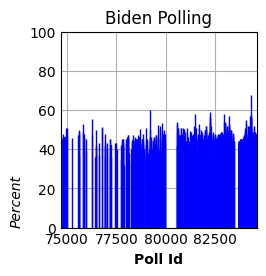

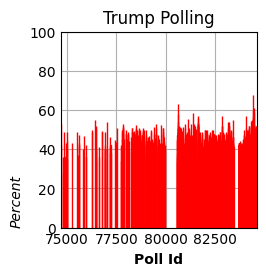

In [5]:
biden = president_polls[(president_polls['candidate_name']=='Joe Biden')]
trump = president_polls[(president_polls['candidate_name']=='Donald Trump')]

biden
trump
                        
plt.style.use('_mpl-gallery')

x = biden['poll_id']
y = biden['pct']

fig, ax = plt.subplots()

ax.bar(x, y, width=1, edgecolor="blue", linewidth=1.0)

ax.set(xlim=(x.min(), x.max()),
       ylim=(0, 100))

plt.xlabel('Poll Id', fontweight='bold')
plt.ylabel('Percent', style='italic', loc='bottom')

plt.title("Biden Polling")
plt.show()
                        
x = trump['poll_id']
y = trump['pct']

fig, ax = plt.subplots()

ax.bar(x, y, width=1, edgecolor="red", linewidth=1.0)

ax.set(xlim=(x.min(), x.max()),
       ylim=(0, 100))

plt.xlabel('Poll Id', fontweight='bold')
plt.ylabel('Percent', style='italic', loc='bottom')


plt.title("Trump Polling")
plt.show()

In [6]:
biden_mean = biden['pct'].mean()
biden_std = biden['pct'].std()
trump_mean = trump['pct'].mean()
trump_std = trump['pct'].std()
print(biden_mean, biden_std, trump_mean, trump_std)

42.06328134026574 4.883278982368899 42.824726618705036 5.040341921483903


In [8]:
senate_polls = pd.read_csv("/Users/csuftitan/Documents/Election2024-main/archive-2/polls/senate_polls.csv")
senate_polls.head()

,poll_id,pollster_id,pollster,sponsor_ids,sponsors,display_name,pollster_rating_id,pollster_rating_name,fte_grade,methodology,...,election_date,stage,nationwide_batch,ranked_choice_reallocated,ranked_choice_round,party,answer,candidate_id,candidate_name,pct
0,84522,468,Tarrance,27.0,NRSC,Tarrance Group,333,Tarrance Group,B+,Live Phone,...,11/5/24,general,False,False,NaN,DEM,Rosen,31010,Jacky Rosen,45.0
1,84522,468,Tarrance,27.0,NRSC,Tarrance Group,333,Tarrance Group,B+,Live Phone,...,11/5/24,general,False,False,NaN,REP,Brown,31105,Sam Brown,40.0
2,84598,1427,NRSC,NaN,NaN,NRSC,695,NRSC,NaN,NaN,...,11/5/24,general,False,False,NaN,DEM,Gallego,30920,Ruben Gallego,41.0
3,84598,1427,NRSC,NaN,NaN,NRSC,695,NRSC,NaN,NaN,...,11/5/24,general,False,False,NaN,REP,Lake,30921,Kari Lake,37.0
4,84598,1427,NRSC,NaN,NaN,NRSC,695,NRSC,NaN,NaN,...,11/5/24,general,False,False,NaN,IND,Sinema,30922,Kyrsten Sinema,17.0


In [9]:
sns.set_theme(style="whitegrid")

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=senate_polls, kind="bar",
    x="poll_id", y="pct", hue="party",
    errorbar="sd", palette="dark", alpha=.6, height=100
)
g.despine(left=True)
g.set_axis_labels("", "Pct vote")
g.legend.set_title("Senate Polling")

In [10]:
senate_polls['poll_id'].count()

262

In [11]:
polls_by_state = senate_polls.pivot_table(index='state', columns='party', values='pct', aggfunc='mean')
polls_by_state.head()

party,DEM,IND,REP
state,,,
Alaska,44.000000,NaN,41.000000
Arizona,39.537838,19.336364,34.075676
California,31.500000,NaN,NaN
Florida,41.000000,NaN,45.000000
Indiana,21.500000,NaN,31.300000


In [13]:
general_polls = pd.read_csv("/Users/csuftitan/Documents/Election2024-main/archive-2/polls/president_polls_historical.csv")

/var/folders/8_/vp0sm8r90t3c1sv5w5ynzf8w0000gn/T/ipykernel_67518/187182037.py:1: DtypeWarning: Columns (15,16,22,24,27) have mixed types. Specify dtype option on import or set low_memory=False.
  general_polls = pd.read_csv("/Users/csuftitan/Documents/Election2024-main/archive-2/polls/president_polls_historical.csv")


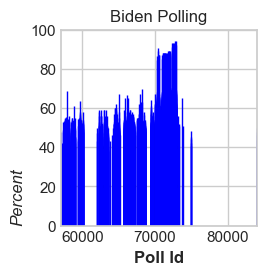

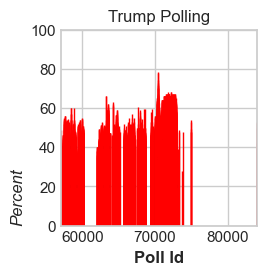

In [14]:
biden = general_polls[(general_polls['candidate_name']=='Joe Biden')]
trump = general_polls[(general_polls['candidate_name']=='Donald Trump')]

                        
plt.style.use('_mpl-gallery')

x = biden['poll_id']
y = biden['pct']

fig, ax = plt.subplots()

ax.bar(x, y, width=1, edgecolor="blue", linewidth=1.0)

ax.set(xlim=(x.min(), x.max()),
       ylim=(0, 100))

plt.xlabel('Poll Id', fontweight='bold')
plt.ylabel('Percent', style='italic', loc='bottom')

plt.title("Biden Polling")
plt.show()
                        
x = trump['poll_id']
y = trump['pct']

fig, ax = plt.subplots()

ax.bar(x, y, width=1, edgecolor="red", linewidth=1.0)

ax.set(xlim=(x.min(), x.max()),
       ylim=(0, 100))

plt.xlabel('Poll Id', fontweight='bold')
plt.ylabel('Percent', style='italic', loc='bottom')


plt.title("Trump Polling")
plt.show()

In [15]:
general_polls['state'] = general_polls['state'].replace("Maine CD-1",'Maine')
general_polls['state'] = general_polls['state'].replace("Maine CD-2",'Maine')

In [17]:
average_polls = general_polls.groupby(['poll_id', 'candidate_name','state', 'party']).agg({'pct': 'mean'})

# Reset index to make 'poll_id' and 'candidate_name' columns again
average_polls.reset_index(inplace=True)

In [18]:
gen_polls_by_id = average_polls.groupby(['poll_id','party','state']).agg({'pct':'mean'})
gen_polls_by_id.reset_index(inplace=True)
gen_polls_by_id

,poll_id,party,state,pct
0,57026,DEM,Ohio,46.500000
1,57026,REP,Ohio,45.250000
2,57275,DEM,North Carolina,46.333333
3,57275,REP,North Carolina,45.333333
4,57407,DEM,New Hampshire,51.733333
...,...,...,...,...
6928,84048,CON,Wisconsin,0.700000
6929,84048,DEM,Wisconsin,47.600000
6930,84048,GRE,Wisconsin,0.700000
6931,84048,LIB,Wisconsin,3.400000


In [19]:
gen_polls_by_state = gen_polls_by_id.pivot_table(index='state', columns='party', values='pct')
gen_polls_by_state.reset_index(inplace=True)
gen_polls_by_state

party,state,CON,DEM,GRE,IND,LIB,OTH,PSL,REP,SWP
0,Alabama,NaN,38.962568,1.000000,NaN,5.733333,NaN,NaN,57.665405,NaN
1,Alaska,NaN,44.131857,NaN,NaN,8.000000,NaN,NaN,51.903571,NaN
2,Arizona,0.00,48.467338,0.475000,0.857143,2.146341,NaN,NaN,45.307629,NaN
3,Arkansas,NaN,38.997857,1.000000,NaN,2.000000,NaN,NaN,58.553393,NaN
4,California,NaN,60.693600,1.400000,NaN,1.940000,NaN,NaN,33.287793,NaN
5,Colorado,0.00,54.858050,1.460000,1.000000,3.100000,NaN,NaN,40.428679,NaN
6,Connecticut,NaN,59.748030,0.500000,NaN,1.700000,NaN,NaN,34.841818,NaN
7,Delaware,NaN,62.175000,1.000000,NaN,2.000000,NaN,NaN,35.340893,NaN
8,District of Columbia,NaN,88.174400,NaN,NaN,NaN,NaN,NaN,9.523800,NaN
9,Florida,0.00,48.336855,0.580000,0.750000,1.342735,0.000,1.0,46.225641,NaN


In [21]:
delegate_counts = pd.read_csv("/Users/csuftitan/Documents/Election2024-main/archive-2/delegate_counts.csv")
delegate_counts['State'] = delegate_counts['State'].str.replace(" >",'')
delegate_counts.head()

,Date,State,Total delegates,Trump,Haley,DeSantis,Ramaswamy
0,15-Jan,Iowa,40,20,8,9,3
1,23-Jan,New Hampshire,22,13,9,0,0
2,8-Feb,Nevada,26,26,0,0,0
3,8-Feb,Virgin Islands,4,4,0,0,0
4,24-Feb,South Carolina,50,47,3,0,0


In [22]:
error = 3.0

In [23]:
biden_count = gen_polls_by_state[gen_polls_by_state['DEM']>gen_polls_by_state['REP']+error]

In [24]:
biden_count = pd.merge(biden_count, delegate_counts, left_on='state', right_on='State', how='left')
biden_count.head()

,state,CON,DEM,GRE,IND,LIB,OTH,PSL,REP,SWP,Date,State,Total delegates,Trump,Haley,DeSantis,Ramaswamy
0,Arizona,0.0,48.467338,0.475,0.857143,2.146341,NaN,NaN,45.307629,NaN,19-Mar,Arizona,43.0,0.0,0.0,0.0,0.0
1,California,NaN,60.693600,1.400,NaN,1.940000,NaN,NaN,33.287793,NaN,5-Mar,California,169.0,169.0,0.0,0.0,0.0
2,Colorado,0.0,54.858050,1.460,1.000000,3.100000,NaN,NaN,40.428679,NaN,5-Mar,Colorado,37.0,24.0,12.0,0.0,0.0
3,Connecticut,NaN,59.748030,0.500,NaN,1.700000,NaN,NaN,34.841818,NaN,2-Apr,Connecticut,28.0,0.0,0.0,0.0,0.0
4,Delaware,NaN,62.175000,1.000,NaN,2.000000,NaN,NaN,35.340893,NaN,2-Apr,Delaware,16.0,0.0,0.0,0.0,0.0


In [25]:
trump_count = gen_polls_by_state[gen_polls_by_state['REP']>=gen_polls_by_state['DEM']+error]
trump_count = pd.merge(trump_count, delegate_counts, left_on='state', right_on='State', how='left')
trump_count.head()

,state,CON,DEM,GRE,IND,LIB,OTH,PSL,REP,SWP,Date,State,Total delegates,Trump,Haley,DeSantis,Ramaswamy
0,Alabama,NaN,38.962568,1.0,NaN,5.733333,NaN,NaN,57.665405,NaN,5-Mar,Alabama,50,50,0,0,0
1,Alaska,NaN,44.131857,NaN,NaN,8.000000,NaN,NaN,51.903571,NaN,5-Mar,Alaska,29,29,0,0,0
2,Arkansas,NaN,38.997857,1.0,NaN,2.000000,NaN,NaN,58.553393,NaN,5-Mar,Arkansas,40,39,1,0,0
3,Idaho,NaN,39.081346,NaN,NaN,NaN,NaN,NaN,58.604231,NaN,2-Mar,Idaho,32,32,0,0,0
4,Indiana,NaN,43.032500,NaN,NaN,4.100000,NaN,NaN,53.309853,NaN,7-May,Indiana,58,0,0,0,0
